In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
import numpy as np # linear algebra
import pandas as pd

In [3]:
df = pd.read_csv("blogtext.csv",nrows=20000)

In [4]:
df.shape

(20000, 7)

In [5]:
df.sample(10)

,id,gender,age,topic,sign,date,text
15993,3364922,female,16,Student,Capricorn,"17,May,2004","well, as you can see i have put up a co..."
13773,468786,male,45,Religion,Aries,"24,June,2004",Our big outreach to teens is toni...
2435,589736,male,35,Technology,Aries,"05,August,2004","Besides, it is an 'Army of One' aft..."
18030,3657741,female,23,indUnk,Cancer,"20,July,2004",urlLink A Tyson's Chicken work...
16865,3970082,female,26,indUnk,Gemini,"29,July,2004",God Bless Reverend Al Sharpton. I have ...
460,649790,female,24,indUnk,Scorpio,"24,May,2004",Man oh man I really should be p...
19460,756463,male,35,Technology,Scorpio,"10,June,2004",This cracks me up... the funny...
13546,1976124,male,25,indUnk,Libra,"15,January,2004","Well, for those keeping track, so..."
9896,3291253,male,27,Education,Virgo,"26,May,2004",urlLink The New York Times > New Y...
2302,589736,male,35,Technology,Aries,"05,August,2004",Bear in mind that I am not at all a...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20000 non-null  int64 
 1   gender  20000 non-null  object
 2   age     20000 non-null  int64 
 3   topic   20000 non-null  object
 4   sign    20000 non-null  object
 5   date    20000 non-null  object
 6   text    20000 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.1+ MB


In [7]:
df.gender.value_counts()

male      11354
female     8646
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

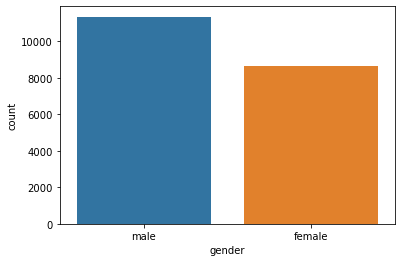

In [8]:
sns.countplot(x='gender',data=df)

<AxesSubplot:xlabel='sign', ylabel='count'>

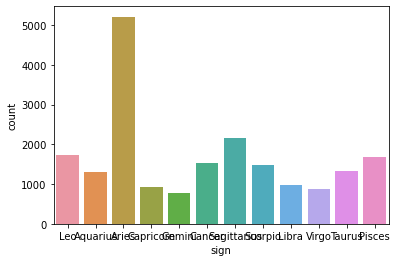

In [9]:
sns.countplot(x='sign',data=df)

In [10]:
df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [11]:
df.drop(['id','date'], axis=1, inplace=True)


In [12]:
df['age']=df['age'].astype('object')

In [13]:
df['clean_data']=df['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))

In [14]:
df['clean_data']=df['clean_data'].apply(lambda x: x.lower())

In [15]:
df['clean_data']=df['clean_data'].apply(lambda x: x.strip())

In [16]:
print("Actual data=======> {}".format(df['text'][1]))

Actual data=======>            These are the team members:   Drewes van der Laag           urlLink mail  Ruiyu Xie                     urlLink mail  Bryan Aaldering (me)          urlLink mail          


In [17]:
print("Cleaned data=======> {}".format(df['clean_data'][1]))

Cleaned data=======> these are the team members drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering me urllink mail


In [18]:
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

In [19]:
df['clean_data']=df['clean_data'].apply(lambda x: ' '.join([words for words in x.split() if words not in stopwords]))

In [20]:
df['clean_data'][6]

'somehow coca cola way summing things well early flagship jingle like buy world coke tune like teach world sing pretty much summed post woodstock era well add much sales catchy tune korea coke theme urllink stop thinking feel pretty much sums lot korea koreans look relaxed couple stopped thinking started feeling course high regard education math logic deep think many koreans really like work emotion anything else westerners seem sublimate moreso least display different way maybe scratch westerners koreans probably pretty similar context different anyways think losing korea repeat stop thinking feel stop thinking feel stop thinking feel everything alright'

In [21]:
df['labels']=df.apply(lambda col: [col['gender'],str(col['age']),col['topic'],col['sign']], axis=1)

In [22]:
df.head()

,gender,age,topic,sign,text,clean_data,labels
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,These are the team members: Drewe...,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing!!! testing!!!,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


In [23]:
df=df[['clean_data','labels']]

In [24]:
X=df['clean_data']

In [25]:
Y=df['labels']

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
vectorizer=CountVectorizer(binary=True, ngram_range=(1,2))


In [28]:
X=vectorizer.fit_transform(X)

In [29]:
vectorizer.get_feature_names()[:5]

['aa', 'aa aa', 'aa advert', 'aa amazing', 'aa anger']

In [30]:
label_counts=dict()

for labels in df.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[label]+=1
        else:
            label_counts[label]=1

In [31]:
label_counts

{'male': 11354,
 '15': 1097,
 'Student': 2637,
 'Leo': 1732,
 '33': 769,
 'InvestmentBanking': 71,
 'Aquarius': 1313,
 'female': 8646,
 '14': 811,
 'indUnk': 7789,
 'Aries': 5209,
 '25': 1190,
 'Capricorn': 930,
 '17': 1961,
 'Gemini': 780,
 '23': 1963,
 'Non-Profit': 204,
 'Cancer': 1536,
 'Banking': 89,
 '37': 130,
 'Sagittarius': 2153,
 '26': 919,
 '24': 1557,
 'Scorpio': 1485,
 '27': 2320,
 'Education': 759,
 '45': 72,
 'Engineering': 357,
 'Libra': 983,
 'Science': 87,
 '34': 871,
 '41': 82,
 'Communications-Media': 414,
 'BusinessServices': 184,
 'Sports-Recreation': 120,
 'Virgo': 871,
 'Taurus': 1330,
 'Arts': 358,
 'Pisces': 1678,
 '44': 9,
 '16': 1236,
 'Internet': 778,
 'Museums-Libraries': 67,
 'Accounting': 35,
 '39': 105,
 '35': 2494,
 'Technology': 2989,
 '36': 1726,
 'Law': 47,
 '46': 188,
 'Consulting': 166,
 'Automotive': 111,
 '42': 47,
 'Religion': 182,
 '13': 113,
 'Fashion': 1622,
 '38': 85,
 '43': 6,
 'Publishing': 70,
 '40': 1,
 'Marketing': 207,
 'LawEnforcemen

In [32]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [33]:
Y=binarizer.fit_transform(df.labels)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2)

In [36]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [37]:
model=LogisticRegression(solver='lbfgs')

In [38]:
model=OneVsRestClassifier(model)

In [39]:
model.fit(Xtrain,Ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [40]:
Ypred=model.predict(Xtest)

In [41]:
Ypred_inversed = binarizer.inverse_transform(Ypred)
y_test_inversed = binarizer.inverse_transform(Ytest)

In [42]:
for i in range(5):
    print('Text:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        Xtest[i],
        ','.join(y_test_inversed[i]),
        ','.join(Ypred_inversed[i])
    ))

Text:	  (0, 1128510)	1
  (0, 997482)	1
  (0, 643280)	1
  (0, 432702)	1
  (0, 655426)	1
  (0, 433581)	1
  (0, 602851)	1
  (0, 323970)	1
  (0, 1182275)	1
  (0, 861566)	1
  (0, 922822)	1
  (0, 236654)	1
  (0, 272938)	1
  (0, 1083113)	1
  (0, 1159934)	1
  (0, 472223)	1
  (0, 339287)	1
  (0, 459283)	1
  (0, 1251018)	1
  (0, 1197755)	1
  (0, 604534)	1
  (0, 403024)	1
  (0, 919942)	1
  (0, 770719)	1
  (0, 784416)	1
  :	:
  (0, 567870)	1
  (0, 315344)	1
  (0, 1124420)	1
  (0, 862166)	1
  (0, 339320)	1
  (0, 157142)	1
  (0, 567877)	1
  (0, 391205)	1
  (0, 365775)	1
  (0, 1087530)	1
  (0, 905542)	1
  (0, 246710)	1
  (0, 530206)	1
  (0, 1311226)	1
  (0, 18585)	1
  (0, 324215)	1
  (0, 900088)	1
  (0, 1241589)	1
  (0, 403874)	1
  (0, 1019941)	1
  (0, 514898)	1
  (0, 1248441)	1
  (0, 1020179)	1
  (0, 525768)	1
  (0, 43614)	1
True labels:	23,Leo,Marketing,female
Predicted labels:	female,indUnk


Text:	  (0, 1159934)	1
  (0, 770719)	1
  (0, 78724)	1
  (0, 936386)	1
  (0, 1281594)	1
  (0, 1170100)	1
  

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def print_evaluation_scores(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: ', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: ', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: ', recall_score(Ytest, Ypred, average='micro'))

In [51]:
print_evaluation_scores(Ytest, Ypred)

Accuracy score:  0.16575
F1 score:  0.535183349851338
Average precision score:  0.3507413006713473
Average recall score:  0.405
